<a href="https://colab.research.google.com/github/arkincognito/PyTorch/blob/main/07_Pytorch_MNIST_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(13)
torch.manual_seed(13)
if device == 'cuda':
    torch.cuda.manual_seed_all(13)

In [ ]:
# MNIST dataset
# Note that ToTensor() scales input range from [0,255] to [0.0,1.0].
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:
# Hyper Parameters
training_epochs = 15
batch_size = 16
lr = 0.2

In [ ]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class SoftmaxClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    # 4 input parameter, 3 classes
    self.linear = nn.Linear(784, 10, bias=True).to(device)

  def forward(self, x):
    return self.linear(x)

model = SoftmaxClassifier()

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
for epoch in range(training_epochs+1):
    avg_cost = 0
    total_batch = len(data_loader)

    for  x, y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        x = x.view(-1, 28 * 28).to(device)
        y = y.to(device)

        hypothesis = model(x)
        cost = criterion(hypothesis, y)

        # Initialize all the gradients to zero
        optimizer.zero_grad()
        # Backward Propagation
        cost.backward()
        # Update
        optimizer.step()

        avg_cost += cost / total_batch

    print(f'Epoch: {epoch:4d}/{training_epochs:4d}\tcost = {avg_cost:.9f}')

print('Learning finished')

Epoch:    0/  15	cost = 0.363722026
Epoch:    1/  15	cost = 0.306284696
Epoch:    2/  15	cost = 0.297355711
Epoch:    3/  15	cost = 0.291569918
Epoch:    4/  15	cost = 0.287008166
Epoch:    5/  15	cost = 0.284205228
Epoch:    6/  15	cost = 0.280898720
Epoch:    7/  15	cost = 0.278865159
Epoch:    8/  15	cost = 0.276334971
Epoch:    9/  15	cost = 0.275651038
Epoch:   10/  15	cost = 0.274451375
Epoch:   11/  15	cost = 0.272695243
Epoch:   12/  15	cost = 0.272442788
Epoch:   13/  15	cost = 0.270810992
Epoch:   14/  15	cost = 0.270295292
Epoch:   15/  15	cost = 0.270354211
Learning finished


Accuracy: 0.8662999868392944
Label:  6
Prediction:  6


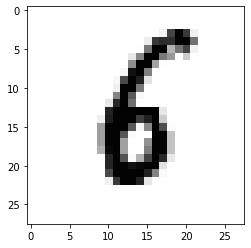

In [ ]:
# Test the model using test sets
with torch.no_grad(): # Indicates that gradients will not be calculated
    x_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.targets.to(device)
    # Take Argmax of softmax to predict the class
    #prediction = model(x_test).max(dim=1)[1]
    prediction = torch.argmax(model(x_test), 1)
    accuracy = (prediction == y_test).float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    x_single_data = mnist_test.data[r].view(-1, 28 * 28).float().to(device)
    y_single_data = mnist_test.targets[r].to(device)

    print('Label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()